# EDA and Hypothesis Simulation for House Prices data

## Author - Catalina Ifrim



In [ ]:
"""
UW DATASCI410-Methods for Data Analysis
Milestone2-Hypothesis Simulation

"""

### Summary

This project contains **Exploratory Data Analysis** of the **house dataset** which includes visual exploration and 
investigatating summary statistics. This allowed drawing insights regarding various factors that influence a home’s price.

It also covers **Hypothesis Simulation** that includes computing summary statistics and confidence intervals
by **classical bootstrap and Bayesian methods**, as well as **hypothesis tests** to determine if the **differences in pairs**
and if multiple populations are significant.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import numpy.random as nr
from scipy.stats import norm
import scipy.stats as ss
import scipy

%matplotlib inline

## 1. Explore the dataset supported by charts and summary statistics

### Dataset information

The dataset used for this assignment is "kc_house_data.csv" and contains house sale prices for King County, including Seattle 
for houses sold between May 2014 and May 2015. The dataset is located at:
https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/kc_house_data.csv.
There are 21613 observations in the dataset and 20 attributes. Each entry contains information about house characteristics. 

Attribute information:

- id: Unique identifier for the house
- date: Date when house was sold
- price: House price
- bedrooms: Number of bedrooms
- bathrooms: Number of bathrooms
- sqft_living: Square footage of the home 
- sqft_lot: Square footage of the lot
- floors: Number of floors (levels) in the house
- waterfront: House which has a view to a waterfront
- view: Has been viewed
- condition: How good the condition is (overall). It is coded on a 1-5 scale, with 1 being "poor" and 5 being "very good". 
- grade: Overall grade given to the housing unit, based on King County grading system. The grade refers to the design and 
quality of the construction.
- sqft_above: Square footage of the house apart from basement
- sqft_basement: Square footage of the basement
- yr_built: Built year
- yr_renovated: Year when house was renovated
- zipcode: Zipcode of the house location
- lat: Latitude coordinate
- long: Longitude coordinate
- sqft_living15: The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15: The square footage of the land lots of the nearest 15 neighbors 

In [2]:
# Load data
filename = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/kc_house_data.csv'
house_price = pd.read_csv(filename)

In [3]:
# Check the size of dataset and the data types of the columns
house_price.info(verbose=2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Observations regarding the dataset:

- There are more than 21613 entries in the dataset.
- There are 20 columns most of them containing numeric data, either floating point number (float64) or integer (int64). Only 
the column 'date' is of type "object".

In [4]:
# Display a few rows from the dataset
house_price.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


There are a few observations that we can draw looking at this lines from the dataframe:
  
- The column 'condition' has integer values from 1 to 5 corresponding to house condition. Similar the column 'grade' contains
values between 1-13, corresponding to the overall grade of the house.
- The column 'bathrooms' display values  of 1, 2.25, 4 etc. that correspond to different types of bathrooms ("full bath", 
"half-bath" or "3/4 bath")
- The column 'waterfront' contains only two values, 0 and 1 coresponding to houses that have a waterfront view or not. 

In [5]:
# Display summary statistics
house_price.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


From the summary statistics can be observed some useful information:

- The average price value is ~540,088 which is slightly higher than the median (450,000). This indicates a skewed distribution.
- The min and max price values show a very large range, between 75,000 and 7,700,000. 
- The standard deviation for price is very high with a value of 367,127. This indicates dispersed values.
- Also, for price, the lower IQR is much smaller (approximately half) than the upper IQR. It can be noted that 25% of the 
prices are less than 321,950 while 25% are more than 645,000. 
- The mean value of the living space is ~2080 sqft, with a min of 290 sqft and a max of 13,540 sqft. The upper and lower IQR 
for the sqft_living indicate that 25% of sqft_living is less than 1427 sqft, while 25% is more than 2550 sqft.
- For bedrooms the average number is 3 and for baths is 2.

#### Check for missing values

In [6]:
# Check for missing values by counting the NaNs
house_price.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no missing values in the dataframe.

#### Treating outliers

To verify the counts of unique values in each column it is defined a function "count_unique". The function is called and 
passed a list with some of the variables in the dataframe.

In [7]:
# Make a list of numeric columns in dataset
columns = ["bedrooms", "bathrooms", "floors", "waterfront", "view", "condition", "grade", "zipcode"]

# Define a function for counting the unique values in columns
def count_unique(df, cols):
    """Print the frequency table for a list of columns in a dataset"""
    for col in cols:
        print('\n' + 'Column ' + col)
        print(df[col].value_counts())

# Call the function count_unique
count_unique(house_price, columns)


Column bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

Column bathrooms
2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

Column floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

Column waterfront
0    21450
1      163
Name: waterfront, dtype: int64

Column view
0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

Column condition
3    14031
4     5679
5     1701
2      172
1       30
Name: condition

The frequency count for columns 'bathrooms' and 'bedrooms' show that both these columns have outliers. There are values of 0
bathrooms and 0 bedrooms, which do not make sense for a house. There are also some extreme values, like 33 bedrooms. 

To avoid missing significant findings or distort the real results, the outliers need to be treated. The outliers in both columns
'bathrooms' and 'bedrooms' will be replaced with the mean of the non-outliers. The low and high limits for acceptable values is
the mean plus/minus 2 standard deviations. 

In [ ]:
# Check the histograms of 'bathrooms' and 'bedrooms' before replacing the outliers
#plt.hist(house_price['bathrooms'])
#plt.hist(house_price['bedrooms'])

In [8]:
# Replace outliers in column 'bathrooms' with the mean of non-outliers

# Calculate the limits for values that are not outliers
LimitHi = np.mean(house_price['bathrooms']) + 2*np.std(house_price['bathrooms'])
LimitLo = np.mean(house_price['bathrooms']) - 2*np.std(house_price['bathrooms'])

# Create Flag for values outside of limits
FlagBad = (house_price['bathrooms'] < LimitLo) | (house_price['bathrooms'] > LimitHi)

# FlagGood is the complement of FlagBad
FlagGood = ~FlagBad

# Replace outleiers with the mean of non-outliers
house_price.loc[FlagBad,'bathrooms'] = np.mean(house_price.loc[FlagGood,'bathrooms'])

# Check the counts for 'bathrooms'
#house_price['bathrooms'].value_counts()

In [9]:
# The values in column 'bathrooms' have now six decimals, so they will be rounded to two decimals

# Round to two decimals using round function for Pandas dataframe
house_price['bathrooms'] = house_price['bathrooms'].round(decimals=2)

In [10]:
# Replace outliers in column 'bedrooms' with the mean of non-outliers

# Calculate the limits for values that are not outliers. 
LimitHi = np.mean(house_price['bedrooms']) + 2*np.std(house_price['bedrooms'])
LimitLo = np.mean(house_price['bedrooms']) - 2*np.std(house_price['bedrooms'])

# Create Flag for values outside of limits
FlagBad = (house_price['bedrooms'] < LimitLo) | (house_price['bedrooms'] > LimitHi)

# FlagGood is the complement of FlagBad
FlagGood = ~FlagBad

# Replace outleiers with the mean of non-outliers
house_price.loc[FlagBad,'bedrooms'] = np.mean(house_price.loc[FlagGood,'bedrooms'])

# Check frequency count for 'bathrooms'
#house_price['bedrooms'].value_counts()

In [11]:
# Column'bedrooms' is now of type 'float' so it needs to be cast back to integer type

# Cast the column bedrooms to type int
house_price.loc[:,'bedrooms'] = house_price.loc[:,'bedrooms'].astype(int)

In [ ]:
# Check the histograms of 'bathrooms' and 'bedrooms' after replacing the outliers
#plt.hist(house_price['bathrooms'])
#plt.hist(house_price['bedrooms'])

In [12]:
# Replace the integers in column waterfront with Yes and No

Replace = house_price.loc[:, "waterfront"] == 0
house_price.loc[Replace, "waterfront"] = "No"

Replace = house_price.loc[:, "waterfront"] == 1
house_price.loc[Replace, "waterfront"] = "Yes"

#house_price.loc[:, 'waterfront'].value_counts()

### Visualizations

#### Bar plots

To visualize the display of counts of unique values for various variables were used bar plots. These plots yielded several 
insights for the following variables: <br>
- **Bar plot of 'condition'** - the most common condition for sold houses is 3 (an average value, between 1 and 5)
- **Bap plot of 'grade'** - the highest count is for grade 7 followed by grades 8 and 9. 
- **Bar plot of 'bathrooms'** - the highest frequency is for number of baths 2.5 followed by 1 and 1.75
- **Bar plot of 'bedrooms'** - most of the houses have 3 bedrooms, followed by 4, 2 and 5.
- **Bar plot of 'zipcode'** - the bar plot for the nominal variable ‘zipcode’ shows that there are several groups of zipcodes,  
sharing the same frequency (e.g. one group has a count of 600, next group of 500 and so on).

#### Box plots and Violin plots

For comparing the distribution of a variable grouped by another variable were used box plots and violin plots. <br>
- **Box plot of 'price' grouped by 'zipcode'** -  indicates that for most zipcodes, the median price is 500K-600K. There are
few zipcodes with higher IQR and higher median prices of 1000K-1200K. The highest average price is of 1800K-1900K (zipcode 
98030). All the zipcodes show a significant number of outliers - these are high-priced homes, with values of 7000K-8000K. 
- **Violin plot of 'price' grouped by 'waterfront'** -  shows a median price significantly higher for waterfront houses, with a 
larger IQR than for the houses with no waterfront view.

#### Heatmap of the correlation matrix

To examine the relationships between variables in the dataset it was created a correlation matrix. Initially it was calculated
the correlation matrix including all the variables in the dataset. After analyzing the correlations between price and variables,
it was computed a smaller correlation matrix that narrows down the relationships that are most interesting for the purpose of 
this analysis.
To display the correlation relationships it was used a heatmap plot. In the heatmap plot below, the darker the color, the 
stronger the relationship between the variables. The heatmap is also annotated and displays the absolute value of the 
correlation coefficient between the variables.

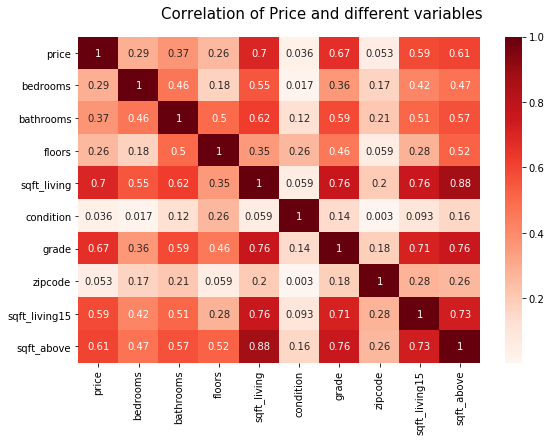

In [13]:
# Correlation matrix using some variables 
house_corr = house_price[["price", "bedrooms", "bathrooms", "floors", "sqft_living", "condition", "grade", "zipcode", "sqft_living15", "sqft_above"]].corr().abs()
fig, ax=plt.subplots(figsize=(9,6))                                               # Create a figure and a subplot
fig.suptitle('Correlation of Price and different variables', fontsize=15, y=.95)  # Give a title to the plot
heatmap = sns.heatmap(house_corr, cmap='Reds', annot=True) 

It can be observed that ‘sqft_living’, ‘grade’,  ‘sqft_living15’, ‘sqft_above’ have a strong correlation with price.
Also, ‘bathrooms’ and ‘bedrooms’ display a good relationship with the price. A lower correlation is displayed for ‘floors’ and
‘condition’. As it is expected, many of the variables related to the structure of the house are also highly correlated with each
other. These include the living square footage and the number of rooms. For example there is a high correlation between 
‘sqft_living’ and ‘sqft_above’ (which includes the usable space of the house) or ‘sqft_living’ and ‘bathrooms’ or 'bedrooms'.

#### Scatter plots

To ensure that the relationships between price and various variables are really significant were applied visualization methods. 
The plots used were scatter plots of price vs different variables, both with large and low correlation coefficients. Some of 
the scatter plots that show a strong relationship of price with several variables are presented below. 

#### Multiple scatter plots of Price vs correlated Variables

In [14]:
# Create Pandas series for each column that will be used in scatter plots

bath = house_price['bathrooms']
bed = house_price['bedrooms']
grade = house_price['grade']
sqft_living15 = house_price['sqft_living15']
sqft_above = house_price['sqft_above']
sqft_living = house_price['sqft_living']

price = house_price['price']

<Figure size 432x288 with 0 Axes>

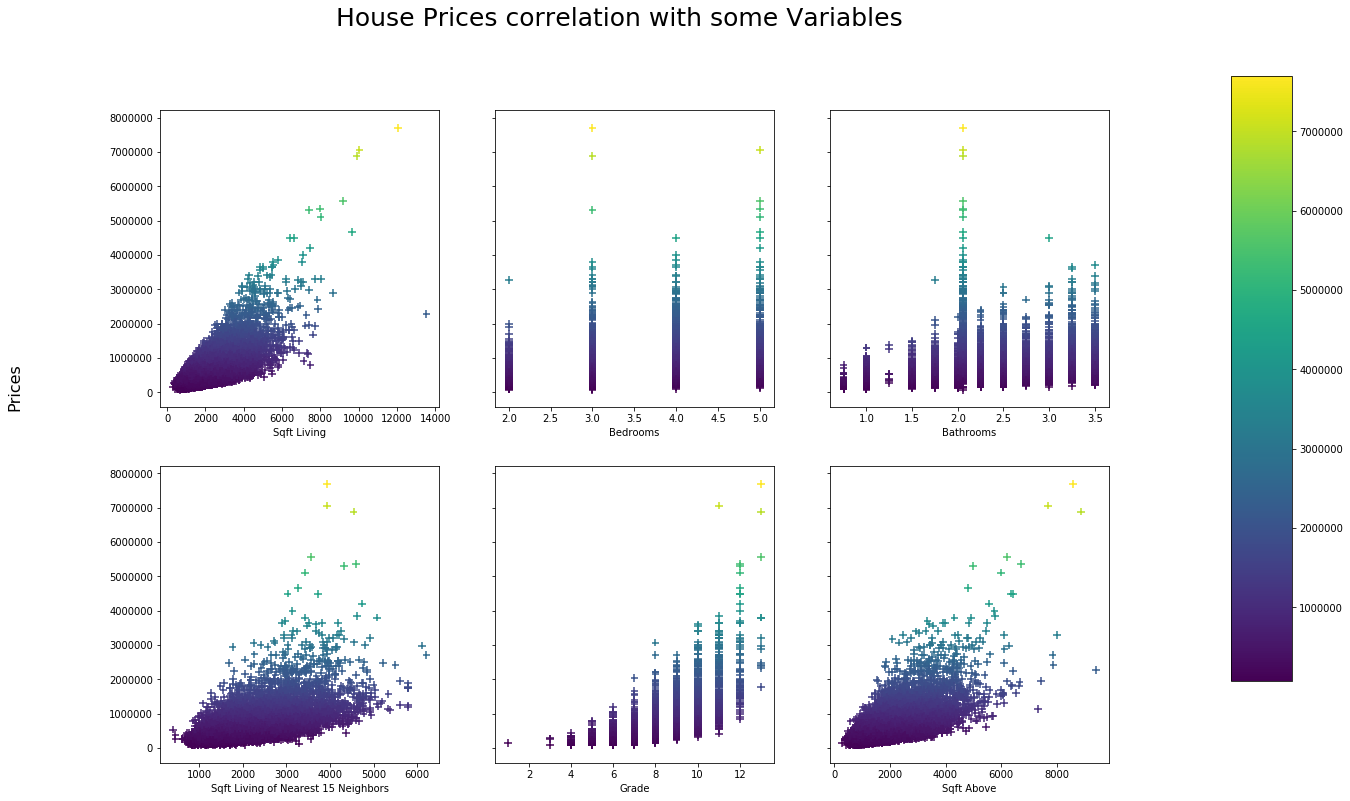

In [15]:
# Create a collection of subplots that share the same color bar

f = plt.figure()      # Define plot area
# Create subplots sharing y axis and not sharing x axis
f, axes = plt.subplots(nrows = 2, ncols = 3, sharex=False, sharey = True, figsize=(17,12))

f.suptitle('House Prices correlation with some Variables', fontsize=25, y=1.0)  # Give the plot a title
f.text(0.0001, 0.56, 'Prices', va='center', rotation='vertical', fontsize=16)   # Set the y axis label

# Set the marker shape and marker size for each of the scatter subplot

sc = axes[0][0].scatter(sqft_living, price, c = price, marker = "+", s = 60)   
axes[0][0].set_xlabel('Sqft Living')

axes[0][1].scatter(bed, price, c = price, marker = "+", s = 60)   
axes[0][1].set_xlabel('Bedrooms')

sc = axes[0][2].scatter(bath, price, c = price, marker = "+", s = 60)   
axes[0][2].set_xlabel('Bathrooms')

axes[1][0].scatter(sqft_living15, price, c = price, marker = "+", s = 60)
axes[1][0].set_xlabel('Sqft Living of Nearest 15 Neighbors')

axes[1][1].scatter(grade, price, c = price, marker = "+", s = 60)
axes[1][1].set_xlabel('Grade')

sc = axes[1][2].scatter(sqft_above, price, c = price, marker = "+", s = 60)
axes[1][2].set_xlabel('Sqft Above')

# Add separate colorbar axes
cbar_ax = f.add_axes([1, 0.22, 0.05, 0.7])

#Set the data for the colorbar using a ScalarMappable argument
f.colorbar(sc, cax=cbar_ax)

plt.show()


**Scatter plot of ‘price’ vs ‘sqft_living ’** - shows a strong relationship between the square footage of a home and its price.
Houses with square footage of ~1500-3500 sqft have smaller prices compared with houses that have over 5000 sqft. The plot shows
also some very high-priced homes, marked in light green and yellow, with high square footage (10000-12000 sqft) and high prices
(7000K-8000K).

**Scatter plot of ‘price’ vs ‘sqft_living15 ’** - the ‘sqft_living15 ’, which is a measure of the square footage of the nearest
15 neighbors has a very strong correlation with the price. The higher the square footage of neighborhood homes, the higher gets
the price for a house. This means that a home’s value will be similar to the prices of the houses in the neighborhood. 

**Scatter plot of ‘price’ vs ‘sqft_above ’** - price shows also a very strong correlation with ‘sqft_above’ which includes the
usable space in a house. It can be observed how prices increase with the amount of the usable space in the house. 
The sctter plot of ‘sqft_above’ and ‘sqft_living’ highlight also that they are highly correlated with each other.

**Scatter plot of ‘price’ vs ‘bathrooms’** -  shows a good relationship between the price and the number of baths. The price 
increases from 500K-1000K for 1-1.5 baths to ~3000k for 3 baths.For the most common number of baths of 2-2.5, there is high 
range of prices, with houses of 7000K-8000K, represented as outliers (light green and yellow marks on the plot).

**Scatter plot of ‘price’ vs ‘bedrooms’** - the home prices increase also with the number of bedrooms. For 2 bedrooms the 
density of prices lies between 500K-1500K, and for  4-5 bedrooms, the prices go up to 4000K-5000K. The most common number of 
bedrooms is 3 with the highest range of prices.

**Scatter plot of ‘price’ vs ‘grade’** - shows a clear increase of ‘price’ with ‘grade’. This is expected, since ‘grade’ 
assesses the overall design of the house and the quality of the construction. 

There are a few other scatter plots investigated that yielded the following insights:

**Scatter plot of ‘price’ vs ‘condition’** - shows that ‘average’ houses, with condition ratings 3 and 2 tend to perform 
the best in terms of price. Although it may be expected that ‘condition’ to be highly related with price (since it shows the 
overall condition of the house), the plot does not display a clear relationship between these variables.
This may be due to the fact that the condition values are relative to age and grade - which refers to the design and quality of
the construction rather than the utility and functionality of the building. For example, a new building with a good design,
could be given an ‘average’ condition rating if some functional repairs are needed. 
The scatter plot of ‘grade’ vs ‘condition’  shows that ‘average’ condition houses also tend to have the highest-grade rating.

**Scatter plots of ‘price’ vs ‘floors’ and ‘view’** - do not display a clear relationship with house price. 

## 2. Identify a likely distribution for several of the features

There are two methods that can be used for checking whether a sample of data is Gaussian or sufficiently Gaussian-like:
- Graphical Methods: plotting the data and qualitatively evaluating whether the data looks Gaussian.
- Statistical (Normality) Tests: calculate statistics on the data and quantify how likely it is that the data was drawn
from a Gaussian distribution.
<br>

From the conclusions above after visually exploring the data, it seems that there are some features that have a strong 
relationship with price. Next it will be identified a distribution for these features, using both graphical and statistical
tests. The features are:
- price
- sqft_living
- sqft_living15

For all these features it is applied the logarithm tranformation, then will be also analyzed.

In [16]:
# Create logarithm transformations for price, sqft_living and sqft_living15 and add the new columns to the adatframe

# Calculate the log price 
house_price['log_price'] = np.log(house_price['price'])

# Calculate the log sqft_living 
house_price['log_sqftliving'] = np.log(house_price['sqft_living'])

# Calculate the sqft_living15 
house_price['log_sqftliving15'] = np.log(house_price['sqft_living15'])

#### Identify a likely distribution for 'price'

For visualizing the frequency distribution of house prices it is plotted the histogram and Kernel Density Estimation plot. 
Below it is defined a function 'hist_plot' that is used for plotting the histogram and kernel density for price.

In [17]:
# Define a function to plot the histogram and KDE of a variable
def hist_plot(vals, lab):
    """Plot the distribution of values"""
    sns.set_style("whitegrid")
    sns.distplot(vals)                   # call the seaborn distplot function 
    plt.title('Histogram of ' + lab)     # give the plot a title
    plt.xlabel('Value')                  # set label for x axis
    plt.ylabel('Density')                # set label for y axis

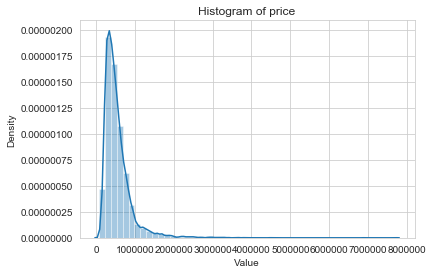

In [18]:
# Plot the histogram of price using the 'hist_plot' function
hist_plot(house_price['price'], 'price')

The histogram and Kernel Density Estimation plot of price show a highly right skewed distribution.  The minimum value for a 
house starts at less than 100K. The highest density of prices lies between 400K-600K, with frequency decreasing sharply after
1000K. The long tail towards the end indicates a much lower frequency corresponding to high-priced houses going up to ~8000K. 
<br>
To verify if the distribution improves, it is calculated and plotted the log price. 

In [ ]:
# Plot the histogram of price using the 'hist_plot' function
#hist_plot(house_price['log_price'], 'log_price')

The log price has an improved distribution, almost Gaussian like. Besides the histograms, below are used 
also Q-Q plots to compare the distributions of 'price' and  'log price'.

In [19]:
# Create numpy arrays for price and log price
price = house_price.loc[:, "price"].to_numpy()
log_price = house_price.loc[:, "log_price"].to_numpy()

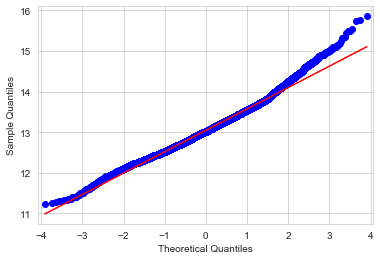

In [20]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# Q-Q plot of price
#qqplot(price, line='s')     # draw the standardized line by setting the ‘line‘ argument to ‘s‘
#pyplot.show()

# Q-Q plot of log price
qqplot(log_price, line='s')  # draw the standardized line by setting the ‘line‘ argument to ‘s‘
pyplot.show()

The Q-Q plots of price and log price show very different behavior. The Q-Q plot of price shows the scatter plot of points 
following the straight line of the normal Q-Q only for a small distance in the middle part, going up strongly on the right
corner and deviating also from the straight line on the left bottom. This confirms the histogram of price having a distribution
very different than Normal. 
<br>
The Q-Q plot of log price displays a closely fitting line with the expected diagonal pattern for a sample from a Gaussian 
distribution. There are only a few deviations mostly on the upper right corner. The Q-Q plots confirm a very close distribution
to Normal for log price than for the price.

Next will be done formal (statistical) tests to check whether price and log price deviates significantly from a Normal 
distribution. The tests assume that the sample was drawn from a Gaussian distribution, so the null and alternate hypothesis
can be formulated as follows:
- H0 = the distribution of price (log price) is normal
- Ha = the distribution of price (log price) does not follow a normal distribution
<br>

The tests used are Kolmogorov Smirnov test and the Shapiro-Wilk test. The threshold level alpha is 5%. The p-Value
is used to decide whether the difference is large enough to reject the null hypothesis. If p-value <= 0.05, than we reject H0, 
and we do not assume a normal distribution. If p-value > 0.05, than we fail to reject H0, so we assume a normal distribution.

The results of Kolmogorov Smirnov test and the Shapiro-Wilk test for both price and log price highlight the following:
- Based on the values of the KS statistic and the p-value obtained for both price and log price using Kolmogorov Smirnov test
it can be rejected the null hypothesis.
- The Shapiro-Wilk test shows that the p-value is very small and finds that the distributions are not normal, for both price 
and log price.

Both Kolmogorov Smirnov and Shapiro-Wilk tests indicate that it cannot be assumed a normal distribution for price or log price.

#### Conclusions
From both qualitative and quantitative tests done above, it can be concluded that the __log price has a distribution much
closer to Normal__ than the price, so in the following tests it will be used the log price.

#### Identify a likely distribution for other features: 'sqft_living' and 'sqft_living15'

Below are created Numpy arrays for sqft_living and sqft_living15, as well as for log sqft_living and log sqft_living15. They
are used for plotting histograms to compare the distributions. They are also used in statistical tests.

In [21]:
# Create numpy arrays for sqft_living and log sqft_living
sqft_living = house_price.loc[:, "sqft_living"].to_numpy()
log_sqftliving = house_price.loc[:, "log_sqftliving"].to_numpy()

# Create numpy arrays for sqft_living15 and log sqft_living15
sqft_living15 = house_price.loc[:, "sqft_living15"].to_numpy()
log_sqftliving15 = house_price.loc[:, "log_sqftliving15"].to_numpy()

In [ ]:
# Plot the histogram of sqft_living using the 'hist_plot' function
#hist_plot(house_price['sqft_living'], 'sqft_living')

# Plot the histogram of log sqft_living using the 'hist_plot' function
#hist_plot(house_price['log_sqftliving'], 'log_sqftliving')

# Plot the histogram of sqft_living15 using the 'hist_plot' function
#hist_plot(house_price['sqft_living15'], 'sqft_living15')

# Plot the histogram of log sqft_living15 using the 'hist_plot' function
#hist_plot(house_price['log_sqftliving15'], 'log_sqftliving15')

The histograms and KDE plots of sqft_living and sqft_living15 are highly skewed with long tails to the right. The plots of 
logarithmic transformations for both these variables have an improved distribution, much closer to Normal as it can be seen for 
log sqft_living.

The Q-Q plots for 'sqft_living' and 'log sqft_living' and for 'sqft_living15' and 'log sqft_living15' confirm the conclusions 
found using histograms: both logarithmic transformations have a distribution very close to Normal.

Besides the graphical methods were used Kolmogorov Smirnov and Shapiro-Wilk tests. 

In [22]:
# Kolmogorov Smirnov test for sqft_living and log_sqftliving


from scipy.stats import kstest, norm

# Kolmogorov Smirnov test for sqft_living
#ks_stat, p = kstest(sqft_living, 'norm')
# Print results
#print('KS-statistics = ', ks_stat, '\np-value = ', p)
# Interpret
#alpha = 0.05
#if p > alpha:
#    print("Sample looks Gaussian (fail to reject H0)")
#else:
#    print("Sample does not look Gaussian (reject H0)")
    

# Kolmogorov Smirnov test for log_sqftliving
ks_stat, p = kstest(log_sqftliving, 'norm')
# Print results
print('KS-statistics = ', ks_stat, '\np-value = ', p)
# Interpret
alpha = 0.05
if p > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")

KS-statistics =  0.99999999285516 
p-value =  0.0
Sample does not look Gaussian (reject H0)


The results of Kolmogorov Smirnov and Shapiro-Wilk tests indicate that it cannot be assumed a normal distribution for 
sqft_living and sqft_living15 or their corresponding log transformation.

#### Conclusions
From the qualitative and quantitavie tests for sqft_living and sqft_living15 features, it can be concluded that only their
logarithmic tranformation (__log_sqftliving__ and __log_sqftliving15__) are __closer to a Normal distribution__.



## 3. Compute basic summary statistics by both classical bootstrap and Bayesian methods

### 3a. Compute basic summary statistic of the mean by classical Bootstrap

In this step it is bootstrapped the log price, trying to estimate its mean. Below is taken a sample from the house_price
dataframe, displayed the first few rows from the bootstrap sample and calculated the mean for the first bootstrap sample. 
Then are used 10000 replicas of the bootstrap sample and plotted the distribution of sample means as well as the mean of the 
sample means.

In [23]:
# Take a sample from the auto dataframe
houses = house_price[:100]

In [24]:
# Check the mean and std of the log price in auto dataframe
print ("Log price mean: ", house_price['log_price'].mean())
print ("Log price std: ", house_price['log_price'].std())

Log price mean:  13.047816917155423
Log price std:  0.5266845190328331


In [ ]:
# Display the first few rows from the bootstrap sample
#houses.sample(frac=1, replace=True).head()

# Calculate the mean for the first bootstrap sample
#houses.sample(frac=1, replace=True).log_price.mean()

In [25]:
# Define a function to plot the histogram and KDE of a variable and the mean line

def hist_plot(vals, lab):
    """Plot the distribution of values"""
    sns.set_style("whitegrid")
    sns.distplot(vals)                   # call the seaborn distplot function 
    plt.title('Histogram of ' + lab)     # give the plot a title
    plt.axvline(vals.mean(), color='red')
    plt.xlabel('Value')                  # set label for x axis
    plt.ylabel('Density')                # set label for y axis

In [26]:
# Use 10000 replicas and check the distribution
n_replicas = 10000                                        # number of bootstrap replicas

houses_bootstrap_means = pd.Series([                           # bootstrap sample log price means
    houses.sample(frac=1, replace=True).log_price.mean()
    for i in range(n_replicas)])

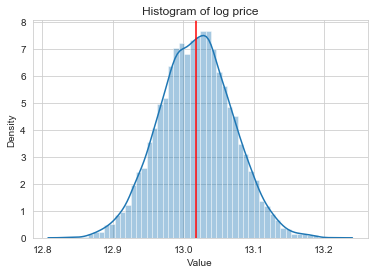

In [27]:
# Plot the histogram of the sampling distribution of means
hist_plot(houses_bootstrap_means, 'log price')

It can be observed the Normal-like shape of the sampling distributions of the means with the mean line at ~ 13.05.

In [28]:
# Calculate the estimated mean and std 
pop_mean = houses_bootstrap_means.mean()
pop_std = houses_bootstrap_means.std()

In [29]:
# Display the estimated and actual values for mean and standard deviation:
print('Estimated mean (%.3f) vs actual mean (%.3f)' % (pop_mean, house_price['log_price'].mean()))
print('Estimated s.d. (%.3f) vs actual s.d. (%.3f)' % (pop_std, house_price['log_price'].std()))

Estimated mean (13.018) vs actual mean (13.048)
Estimated s.d. (0.052) vs actual s.d. (0.527)


It can be observed that the estimated mean obtained by bootstrapping (sampling distribution of the means) has a value very
close to the actual mean of the population. Similar results are for standard deviation.

### 3b. Compute basic summary statistic of the mean by Bayesian methods

Using Bayesian models it will be computed the mean of log price obtained for the posterior distribution. The first step is to 
select a prior which is considered appropriate for the log price, then are computed the likelihood and the posterior. <br>
For prior computation are estimated both the posterior distribution of the mean and the posterior distribution of the standard
deviation.

In [30]:
# Calculate the prior for log price variable
N = 1000
p = np.linspace(min(house_price['log_price']), max(house_price['log_price']), num=N)

# Calculate the prior
pp = scipy.stats.norm.pdf(p, loc=house_price['log_price'].mean(), scale=np.std(house_price['log_price']))
pp = pp / pp.sum()

To calculate the Normal likelihood for log price we need the number of samples, the population mean and standard deviation. 
Below are defined some functions to compute the likelihood, then compute and plot the posterior.

In [31]:
# Define a function to compute the likelihood - we will use a Normal likelihood
def comp_like(p, x): 
    variance = np.std(x)**2                                                # sigmasqr 
    x_mean = np.asarray(x).mean()                                          # xbar                
    print('Mean = %.3f, Standard deviation = %.3f' % (x_mean, np.std(x)))
    n = len(x)
    l = np.exp(-n * np.square(x_mean - p) / (2 * variance))                # use formula for a Normal distribution
    return l / l.sum()

In [32]:
# Define a function to compute the posterior
def posterior(prior, like):
    post = prior * like                      # compute the product of the probabilities
    return post / sum(post)                  # normalize the distribution to sum to unity

In [33]:
# Define a function to plot the posterior
def plot_post(prior, like, post, x):
    maxy = max(max(prior), max(like), max(post))
    pyplot.figure(figsize=(12, 4))
    pyplot.plot(x, like, label='likelihood', linewidth=12, color='black', alpha=.2)
    pyplot.plot(x, prior, label='prior')
    pyplot.plot(x, post, label='posterior', color='green')
    pyplot.ylim(0, maxy)
    pyplot.xlim(0, 1)
    pyplot.title('Density of prior, likelihood and posterior')
    pyplot.xlabel('Parameter value')
    pyplot.ylabel('Density')
    pyplot.legend()

In [34]:
like_house = comp_like(p, house_price['log_price'])    # compute the likelihood
post_house = posterior(pp, like_house)            # compute the posterior

Mean = 13.048, Standard deviation = 0.527


In [ ]:
# Plot the posterior distribution for log price
#pyplot.plot(p, pp, label='prior')
#pyplot.plot(p, like_house, label='likelihood', alpha=.3, linewidth=10)
#pyplot.plot(p, post_house, label='posterior')
#pyplot.title('Prior, Likelihood and Posterior')
#pyplot.legend()

The prior seem to be difused, does not have a lot of effect; the posterior and likelihood are similar. The mean value is
at ~ 13.

#### Comparing the results obtained for the mean by Bootstrap and Bayeasian methods

Comparing the statistics results for mean and standard deviation obtained by bootstrapping with the results obtained for the 
posterior using Bayesian method it can be observed that they are very close. The mean obtained by bootstrap was 13.019 and the
mean value obtained using Bayesian method is 13.018. Similar, the standard deviation using bootstrap is 0.052 and by using 
Bayesian model is 0.522.

## 4. Compute confidence intervals for the above summary statistics by classical bootstrap and Bayesian methods

### 3a. Compute the confidence interval for the mean by classical Bootstrap

For computing the confidence interval for the mean by Bootstrap, are first calculated the mean and standard deviation
for the sampling distribution of means (estimated mean and std). Then it is assumed a normal distribution for log price and 
computed the confidence interval on the mean.

In [35]:
# Calculate the mean and std for the sampling distribution of means (estimated mean and std)
pop_mean = houses_bootstrap_means.mean()
pop_std = houses_bootstrap_means.std()

In [36]:
# We assume a normal distribution for log price
alpha = 0.95
half_width = scipy.stats.norm.ppf((1 + alpha)/2, loc=pop_mean, scale=pop_std) - pop_mean
print('The half width is %.2f' % half_width)

ci_low = pop_mean - half_width
ci_high = pop_mean + half_width

# Compute the confidence interval on the mean
print('The actual mean is %.2f' % house_price['log_price'].mean())
print('The %.2f level CI is (%.2f , %.2f)' % (alpha, ci_low, ci_high))

The half width is 0.10
The actual mean is 13.05
The 0.95 level CI is (12.92 , 13.12)


### 3b. Compute the confidence interval for the mean by Bayesian methods

Below it is computed and compared the confidence interval of the posterior distribution of log price.

In [37]:
# Define function to plot the posterior distribution. Calculate and display the 95% credible interval (HDI) 

def plot_ci(p, post, num_samples, lower_q, upper_q):
    # This function computes a credible interval using an assumption of symetry
    # in the bulk of the distribution to keep the calculation simple
    
    # Compute a large sample by resampling with replacement
    samples = np.random.choice(p, size=num_samples, replace=True, p=post)
    ci = np.percentile(samples, [lower_q*100, upper_q*100]) # compute the quantiles
    
    interval = upper_q - lower_q
#    pyplot.title('Posterior density with %.3f credible interval' % interval)
#    pyplot.plot(p, post, color='blue')
#    pyplot.xlabel('Parameter value')
#    pyplot.ylabel('Density')
#    pyplot.axvline(x=ci[0], color='red')
#    pyplot.axvline(x=ci[1], color='red')
    print('The %.3f credible interval is %.3f to %.3f' 
          % (interval, ci[0], ci[1]))   

In [38]:
# Compute the credible interval
num_samples = 100000

plot_ci(p, post_house, num_samples, lower_q=.025, upper_q=.975)

The 0.950 credible interval is 13.043 to 13.057


#### Comparing the results for confidence interval obtained using Bootstrap and Bayesian methods

The confidence interval for 0.95 level obtained using Bootstrap method is (12.92 , 13.12). Using Bayesian method, the 0.950 
credible interval is (13.043, 13.057).
It can be noted that the results obtained using both methods are very close.

## 5. Leverage confidence intervals in performing hypothesis tests to determine if the differences in pairs and multiple populations are significant

### 4a. Hypothesis tests using classical tests and Tukey HSD

The dependence of price on another categorical variable can be checked via qualitative visualization or via a quantitative 
statistical test. <br> The box plots of price (log price) vs waterfront variable can help visualize the dependence between them.

In [ ]:
# Box plot of price vs waterfront
#fig = plt.figure(figsize=(5, 5)) # Define plot area
#ax = fig.gca() # Define axis 
#house_price.loc[:,['price', 'waterfront']].boxplot(by = 'waterfront', ax = ax)
#ax.set_title('Box plot of price') # Give the plot a main title
#ax.set_ylabel('House Price')# Set text for y axis
#ax.set_ylim(0.0, 8000000.0) # Set the limits of the y axis

The box plots shows that the median price for waterfront houses is significantly higher that for no waterfront homes. Also, 
both categories have outliers, mainly the no waterfront houses.

The formal (statistical) tests that are used to quantitatively check of the dependence of the log price on a categorical 
variable is a two-sided t-test. The two-sided t-test can help to determine if we can reject the null hypothesis that the 
difference of means is not significant. For the 'waterfront' variable, the the null and alternate hypothesis are:
- H0: the mean price of waterfront homes is equal with the mean price of no waterfront homes
- Ha: the mean price of waterfront homes is different than the mean price of no waterfront homes

Based on the groups, are created stratified samples, then selected equal number of samples from each strata. Each strata has the
same number of samples to avoid biased inferences.

#### Create stratified samples and test significance for 'waterfront'

Below it is defined a function that calculates a number of summary statistics and prints them for the test.

In [39]:
# Define a function to do a formal test to see if the differences in means between two populations are significant

def t_test(a, b, alpha, alternative='two-sided'):
    from scipy import stats
    import scipy.stats as ss
    import pandas as pd
    import statsmodels.stats.weightstats as ws
    
    diff = a.mean() - b.mean()                   # calculate the difference in means

    res = ss.ttest_ind(a, b, equal_var=False)
    
    # Get the means by doing CompareMeans of ws for a and b, then we compute the confidence intervals of the difference
    # We do not make any asumption about the variance being identical of the two samples
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal')       
    degfree = means.dof_satt()                              # we compute the degrees of freedom from the means                 

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']         # parameters that we want
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)   # create a Pandas series

In [40]:
# Define a function to create a dataframe, groupby on the original raw dataframe and group by group and return the dataframe
# with the count
def count_mean(df):
    """Group data and create a dataframe with the counts and the means of the groups"""
    # Create the groups
    groups = df.groupby('waterfront') 
    ## Create a data frame with the counts and the means of the groups
    return pd.DataFrame({'count': groups.size(), 'mean': groups.aggregate(np.mean).loc[:, 'log_price']})

count_mean(house_price)

,count,mean
waterfront,,
No,21450,13.039801
Yes,163,14.102618


In [41]:
# Take a small sample, but we want it balanced between the strata
p = 0.001     

# Define a function to create stratified samples
def stratify(dat, p):
    """Create stratified samples"""
    groups = dat.groupby('waterfront')        # Create the groups
    nums = min(groups.size())                # Find the size of the smallest group
    num = int(p * dat.shape[0])              # Compute the desired number of samples per group - based on probability p
    if num <= nums:                          # Test if the desired number of samples is less than the smallest group 
        return groups.apply(lambda x: x.sample(n=num))  # If sufficient group size, sample n = num samples from each strata
    else:                                    # else if p is too large, print a message
        pmax = nums / dat.shape[0]
        print('The maximum value of p = ' + str(pmax)) 

In [42]:
# Create a dataframe which is a stratified sample of the original dataframe
stratified = stratify(house_price, p)

In [43]:
# Display the stratified sample 
stratified.reset_index(inplace=True, drop=True)  
count_mean(stratified)

,count,mean
waterfront,,
No,21,12.892924
Yes,21,14.120645


In [44]:
# Run the t-test for column waterfront
# Check if waterfront and no waterfront categories are significantly different

# Create two Pandas Series for waterfront and no waterfront categories 
waterfront = stratified.loc[stratified.loc[:, 'waterfront'] == 'Yes', 'log_price']      
nowaterfront = stratified.loc[stratified.loc[:, 'waterfront'] == 'No', 'log_price'] 

test_waterfront = t_test(waterfront, nowaterfront, alpha = 0.05)
print(test_waterfront)

DegFreedom    35.199297
Difference     1.227720
Statistic      5.804032
PValue         0.000001
Low95CI        0.798381
High95CI       1.657060
dtype: float64


The t-statistic is large, the p-value is very small and the lower and upper confidence intervals do not include zero. There is
a high confidence that the null hypothesis can be rejected. So the average price of houses stratified by waterfront and no 
waterfront categories is statistically significant different.

#### Apply ANOVA and Tukey's HSD test to compare the log price of houses stratified by 'bedrooms'

(0.0, 8000000.0)

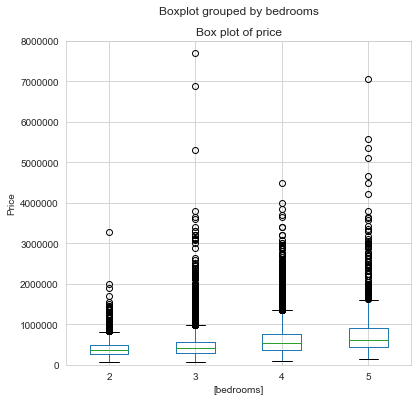

In [45]:
# Box plot of price grouped by bedrooms

fig = plt.figure(figsize=(6, 6))              # Define plot area
ax = fig.gca()                                # Define axis 
house_price.loc[:,['price', 'bedrooms']].boxplot(by = 'bedrooms', ax = ax)
ax.set_title('Box plot of price')             # Give the plot a main title
ax.set_ylabel('Price')                    # Set text for y axis
ax.set_ylim(0.0, 8000000.0)                   # Set the limits of the y axis

The box plot of price vs bedrooms shows a very small variation between the distributions and the medians of the four groups. The
median house price for 5 bedrooms is the highest compared with 2, 3 and 4 bedrooms. The median price for 4 bedrooms is very 
close to median price for 2 bedrooms. To find out if the differences observed graphically are indeed significant are applied 
ANOVA and Tukey HSD tests. So, the null and alternate hypothesis could be formulated as:

H0: all four groups have the same mean <br>
Ha: at least one group has a statistically different mean

Next are created stratified samples for bedrooms variable. The stratified samples will be used for ANOVA and Tukey HSD tests.

In [65]:
# Check the count and mean for each group in body-style
def count_mean(df):
    """Group data and create a dataframe with the counts and the means of the groups"""
    # Create the groups
    groups = df.groupby('bedrooms') 
    ## Create a data frame with the counts and the means of the groups
    return pd.DataFrame({'count': groups.size(), 'mean': groups.aggregate(np.mean).loc[:, 'log_price']})

count_mean(house_price)

,count,mean
bedrooms,,
2,2760,12.799338
3,10370,12.945279
4,6882,13.222538
5,1601,13.389285


In [66]:
# Take a small sample and use stratify function to calculate strata
p = 0.002                                     
def stratify(dat, p):
    groups = dat.groupby('bedrooms')      # Create the groups
    nums = min(groups.size())                # Find the size of the smallest group
    num = int(p * dat.shape[0])              # Compute the desired number of samples per group - based on probability
    if num <= nums:                          # If sufficient group size, sample each group and return. 
        return groups.apply(lambda x: x.sample(n=num))  # we create a lambda function which is an anonymous function
    else:                                    # p is too large
        pmax = nums / dat.shape[0]
        print('The maximum value of p = ' + str(pmax)) 

In [67]:
# Create the stratified sample
stratified = stratify(house_price, p)
# Display the stratified sample 
stratified.reset_index(inplace=True, drop=True)
count_mean(stratified)

,count,mean
bedrooms,,
2,43,12.886582
3,43,13.022711
4,43,13.152048
5,43,13.335866


In [68]:
# Create lists from the body style categories using the stratified dataframe

twoB = stratified.loc[stratified.loc[:, 'bedrooms'] == 2, 'log_price'].tolist()                        
threeB = stratified.loc[stratified.loc[:, 'bedrooms'] == 3, 'log_price'].tolist()                
fourB = stratified.loc[stratified.loc[:, 'bedrooms'] == 4, 'log_price'].tolist()                        
fiveB = stratified.loc[stratified.loc[:, 'bedrooms'] == 5, 'log_price'].tolist()  

#### Apply ANOVA test

The code in the cell below models the ANOVA of the values by groups in bedrooms and prints the results of the model.

In [69]:
# Apply ANOVA test
f_statistic, p_value = ss.f_oneway(twoB, threeB, fourB, fiveB)
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

F statistic = 5.45415687567531
P-value = 0.0013313671519160966


The F statistic is fairly large and the p-value is very small. We can reject the null hypothesis that the four groups have the 
same mean, as the probability of the differences arising from random chance is quite low.
From the above ANOVA results we know that there is some difference in the means of these variables, but we do not know which 
variable is significantly different. From the box plot, we could guess that group corresponding to 5 bedrooms is different, but 
this needs to be checked using the Tukey HDE test.

The Tukey HDE test exhaustively computes the following for each pair of groups: difference of the means; confidence interval 
of the difference in the means; a p-value from the distribution of the differences. The results are displayed in a table. Only
differences in means with a confidence interval not overlapping zero are considered significant.

#### Apply Tukey HSD test

In [70]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Create a dataframe with values from the lists
df = pd.DataFrame({'vals': twoB + threeB + fourB + fiveB,
                   'group_num': ['two_bed'] * 43 + ['three_bed'] * 43 + ['four_bed'] * 43 + ['five_bed'] * 43})
Tukey_HSD = pairwise_tukeyhsd(df.vals, df.group_num)
#Display the results in a table
print(Tukey_HSD)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
 five_bed  four_bed  -0.1838 0.3903 -0.4845  0.1169  False
 five_bed three_bed  -0.3132 0.0377 -0.6139 -0.0124   True
 five_bed   two_bed  -0.4493  0.001   -0.75 -0.1486   True
 four_bed three_bed  -0.1293 0.6596 -0.4301  0.1714  False
 four_bed   two_bed  -0.2655 0.1043 -0.5662  0.0353  False
three_bed   two_bed  -0.1361 0.6269 -0.4368  0.1646  False
----------------------------------------------------------


The last column in the table displays the results of which pair has significant difference for the confidence interval. The 
pairs are five-bed/two-bed and five_bed/three-bed.

Using the 'plot_simultaneous' method it is created a plot of the test results.

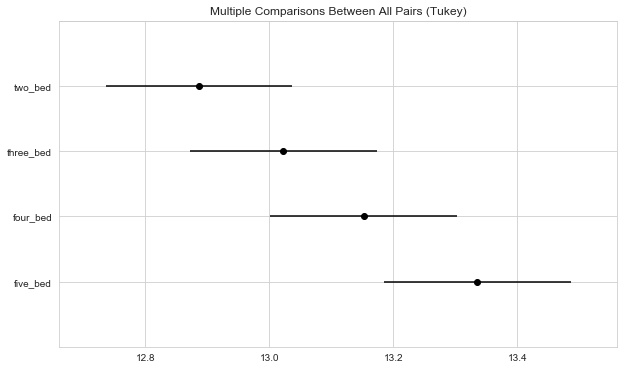

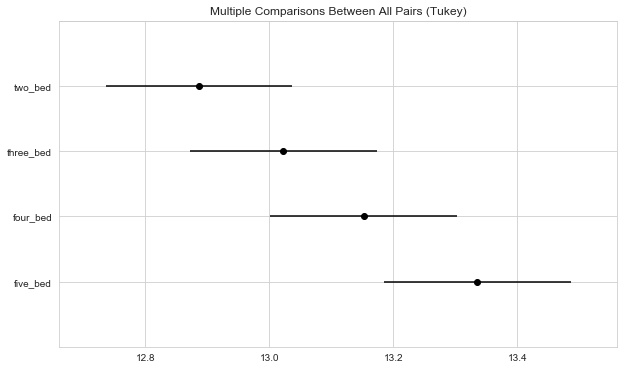

In [71]:
# Create plots of the test results
Tukey_HSD.plot_simultaneous()

Each variable is represented as a line with a dot: the dot is the mean and the line shows the range of the confidence interval
for that mean. The confidence intervals do not overlap if the difference in means is significant at the confidence level. It
seems that the pairs that have a significant difference are: five-bed/two-bed and five-bed/three-bed. Also, four-bed/two-bed
have a small overlap.

From the graphical and formal tests it can be concluded that the five bedrooms category appears to have values distinct 
from the two and three bedrooms houses, and four bedrooms distinct of two bedroom homes. 

### 4b. Bootstrap methods to find differences in pairs

To find differences in pairs for one variable are computed and compared two bootstrap distributions of the means from the 
log price data (bootstrap the means). To bootstrap the difference in means are generated bootstrap samples from the full
dataset and then computed the difference in the means for each sample, generating a distribution of sample mean 'diffs'.
<br>

It is first bootstrapped the means for the groups and then bootstrapped the difference in means trying to 
determine if the mean of the two populations are significantly different.

Below we will try to find the difference in means for house prices by waterfront. The waterfront variable has two categories
corresponding to waterfront houses (1) and houses with no waterfront (0). Below are replaced the codes with "Yes" and
"No" for easier identification.

In [53]:
# Create two dataframes for waterfront and no waterfront categories  
waterfront = house_price[house_price['waterfront'] == 'Yes'] 
nowaterfront = house_price[house_price['waterfront'] == 'No'] 

In [54]:
# Check the means for log price
waterfront['log_price'].mean(), nowaterfront['log_price'].mean()

(14.102617634435386, 13.039801415201271)

In [55]:
# Define function to plot the distributions for groups 
def plot_dists(a, b, nbins, a_label='pop_A', b_label='pop_B'):
    # Create a single sequence of bins to be shared across both
    # distribution plots for visualization consistency.
    combined = pd.concat([a, b])
    breaks = np.linspace(
        combined.min(), 
        combined.max(), 
        num=nbins+1)

    pyplot.subplot(2, 1, 1)
    pyplot.hist(a, bins=breaks, label=a_label, alpha=.5)
    pyplot.axvline(a.mean(), linewidth=4)
    pyplot.legend()
    
    pyplot.subplot(2, 1, 2)
    pyplot.hist(b, bins=breaks, label=b_label, alpha=.5)
    pyplot.axvline(b.mean(), linewidth=4)
    pyplot.legend()

In [ ]:
# Plot the histograms for waterfront and no waterfront and mark the mean
#plot_dists(yes['log_price'], no['log_price'], 20, a_label='yes', b_label='no')

The two distributions of waterfront houses and no waterfront houses, overlap. We would like to know if the means are 
significantly different. For this it will be applied hypothesis testing.
<br>

It will be taken n_replicas of bootstrap samples for houses with/without waterfront and plot the distribution of sample means
as well as the mean of the sample means. Then we can check both distributions, which are on the same scale to make statistical
inferences:
- If there is a big area of overlap we have to accept with 95% confidence the null hypothesis. The means are not significantly
different.
- If the distributions do not overlap, we can reject the null hypothesis. The means are significantly different. 

In [56]:
# Take n_replicas and bootstrap the sample means

n_replicas = 10000                                              # number of bootstrap replicas

waterfront_bootstrap_means = pd.Series([                               # bootstrap sample waterfront means
    waterfront.sample(frac=1, replace=True).log_price.mean()
    for i in range(n_replicas)])

nowaterfront_bootstrap_means = pd.Series([                               # bootstrap sample nowaterfront means
        nowaterfront.sample(frac=1, replace=True).log_price.mean()
        for i in range(n_replicas)])

#plot_dists(yes_bootstrap_means, no_bootstrap_means,            # plot the distribution of sample means
#           nbins=80, a_label='Yes', b_label='No')

The distributions do not overlap, in fact there is a big gap between them so we can reject the null hypothesis that the 
difference is not significant. <br> We can say with 95% confidence that there is a significant statistical difference in 
price means between the waterfront houses and prices of no waterfront houses.

Next, it is bootstrapped the difference in price means for waterfront and no waterfront houses. With this, we try to determine
if the price mean of waterfront and no waterfront populations are significantly different. <br>
In the cell below, are generated bootstrap samples from the full waterfront and no waterfront houses dataset and then 
difference in the means of their log price for each sample, generating a distribution of sample mean 'diffs'.

In [57]:
# Bootstrap difference in means
diffs = []                                 # create an empty list
for i in range(n_replicas):                # 10000 realizations of the difference in means from 10000 bootstrap samples
    sample = house_price.sample(frac=1.0, replace=True)                                    # we sample with replacement
    waterfront_sample_mean = sample[sample['waterfront'] == 'Yes'].log_price.mean()         # compute the means
    nowaterfront_sample_mean = sample[sample['waterfront'] == 'No'].log_price.mean()
    diffs.append(waterfront_sample_mean - nowaterfront_sample_mean)                # compute the difference, put them in list
diffs = pd.Series(diffs) 

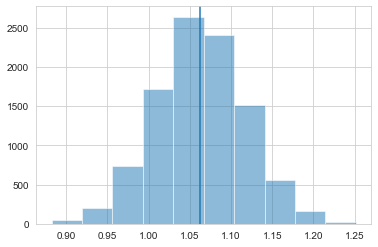

In [58]:
# Plot the histogram of diffs
pyplot.hist(diffs, alpha=.5)
pyplot.axvline(diffs.mean())

It can be observed that the difference is ~ 1.05-1.06 and it is far from zero. It can be infered that the difference in mean
prices of the two populations, waterfront and no waterfront houses, is significantly different.

Next, we want to find out if the distribution of the difference in means is normal, as implied by the CLT (Central Limit 
Theorem). For this it is created a Q-Q normal plot of the bootstrap distribution of the difference in means for waterfront
and no waterfront houses.

In [ ]:
# Plot a Q-Q plot to verify if the bootstrapped distribution is Normal
#import statsmodels.api as sm

#fig = sm.qqplot(diffs, line='s')
#pyplot.title('Quantiles of standard Normal vs. bootstrapped mean')

The points on the Q-Q Normal plot are nearly on a strait line following the diagonal. It can be concluded that the bootstrap
distribution of the difference in means for waterfront and no waterfront houses conforms to the Central Limit Theorem.

Similar analysis, by  bootstrap the means and bootstrap the difference in means was done for bedrooms variable. There are four
categories in bedrooms variable: 2, 3, 4 and 5.
Below are presented the conclusions after applying the bootstrapping methods:
<br>
__bedrooms__: 
- The distributions between houses with 3 bedrooms (highest frequency) and house with 2, 4, or 5 bedrooms do not overlap; in
fact there is a gap between them. We can reject the null hypothesis that the difference is not significant. We can say with
95% confidence that there is a significant statistical difference in means between each of these groups.
- The distributions of the sample means show that the means of the populations are significantly different between 
5 bedrooms and houses with 2 and 3 bedrooms.  

### 4c. Bayesian model to find differences in pairs

Another method to find if the difference in means for pairs is significant, is using Bayesian models. Hypothesis testing using 
Bayesian models is done based on the credible intervals on the posterior distribution.
If the credible intervals overlap, then we accept the null hypothesis. If the credible intervals do not overlapp, we 
reject the null hypothesis with 95% confidence, that the two samples were drawn from the same population distribution.

Below it is presented the Bayesian model for log price by waterfront. First are sampled without replacements 25 samples from 
each group, waterfront and no waterfront houses. Then, for each group it is calculated the prior, computed the likelihood (it 
is used a Normal likelihood) and the posterior. Then are plotted the prior, likelihood and the posterior distributions.
<br>
To compare the posterior distributions of the mean waterfront houses to the distribution of the mean no waterfront, we compute
and compare the confidence intervals. 

In [59]:
# We sample without replacements 25 samples from each group
num_samples = 25    
waterfront = house_price[house_price['waterfront'] == 'Yes'].sample(n=num_samples)
nowaterfront = house_price[house_price['waterfront'] == 'No'].sample(n=num_samples)

In [ ]:
# Compute the posterior distribution for waterfront category

In [60]:
# Calculate the prior for waterfront category
N = 1000
p = np.linspace(min(waterfront['log_price']), max(waterfront['log_price']), num=N)

# We estimate the posterior distribution of the mean and of the standard distribution
pp = scipy.stats.norm.pdf(p, loc=waterfront['log_price'].mean(), scale=np.std(waterfront['log_price']))
pp = pp / pp.sum()

In [61]:
like_waterfront = comp_like(p, waterfront['log_price'])           # compute the likelihood
post_waterfront = posterior(pp, like_waterfront)                  # compute the posterior

Mean = 14.017, Standard deviation = 0.654


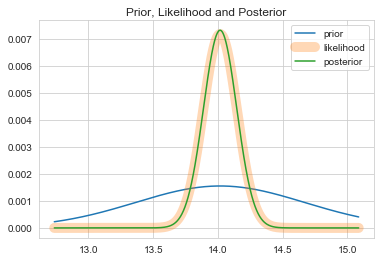

In [62]:
# Plot the prior, likelihood and posterior
pyplot.plot(p, pp, label='prior')
pyplot.plot(p, like_waterfront, label='likelihood', alpha=.3, linewidth=10)
pyplot.plot(p, post_waterfront, label='posterior')
pyplot.title('Prior, Likelihood and Posterior')
pyplot.legend()

It can be observed that the posterior and likelihood have the same distribution. The mean of posterior is ~ 14.2-14.3.

In [63]:
# Define function to plot the posterior distribution. Calculate and display the 95% credible interval (HDI) 

def plot_ci(p, post, num_samples, lower_q, upper_q):
    # This function computes a credible interval using an assumption of symetry
    # in the bulk of the distribution to keep the calculation simple
    
    # Compute a large sample by resampling with replacement
    samples = np.random.choice(p, size=num_samples, replace=True, p=post)
    ci = np.percentile(samples, [lower_q*100, upper_q*100]) # compute the quantiles
    
    interval = upper_q - lower_q
    pyplot.title('Posterior density with %.3f credible interval' % interval)
    pyplot.plot(p, post, color='blue')
    pyplot.xlabel('Parameter value')
    pyplot.ylabel('Density')
    pyplot.axvline(x=ci[0], color='red')
    pyplot.axvline(x=ci[1], color='red')
    print('The %.3f credible interval is %.3f to %.3f' 
          % (interval, ci[0], ci[1]))   

The 0.950 credible interval is 13.765 to 14.268


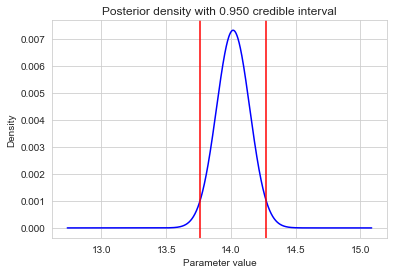

In [64]:
# Compute and plot the confidence interval for the mean rwd drive-wheels
num_samples = 100000
plot_ci(p, post_waterfront, num_samples, lower_q=.025, upper_q=.975)

It can be observed the credible interval between ~ 13.9 to 14.3 marked with red lines on the plot. 

In [ ]:
# Calculate the posterior distribution and credible interval for no waterfront category

# Calculate the prior for fwd 
#N = 1000
#p = np.linspace(min(nowaterfront['log_price']), max(nowaterfront['log_price']), num=N)

# We estimate the posterior distribution of the mean and of the standard distribution
#pp = scipy.stats.norm.pdf(p, loc=nowaterfront['log_price'].mean(), scale=np.std(nowaterfront['log_price']))
#pp = pp / pp.sum()

# Compute the likelihood
#like_nowaterfront = comp_like(p, nowaterfront['log_price'])    

# Compute the posterior
#post_nowaterfront = posterior(pp, like_nowaterfront)           

# Plot the prior, likelihood and posterior
#pyplot.plot(p, pp, label='prior')
#pyplot.plot(p, like_nowaterfront, label='likelihood', alpha=.3, linewidth=10)
#pyplot.plot(p, post_nowaterfront, label='posterior')
#pyplot.title('Prior, Likelihood and Posterior')
#pyplot.legend()

# Compute and plot the confidence interval for the mean fwd drive-wheels
#num_samples = 100000
#plot_ci(p, post_nowaterfront, num_samples, lower_q=.025, upper_q=.975)

Conclusions:
- The CI for waterfront category is ~ 13.8-14.4 and the CI for no waterfront is ~ 12.9-13.3 
- There is absolutely no overlapp between the two CI, there is actually a gap between them
<br>

We can infer with 95% confidence that the prices for waterfront houses are significantly different from the prices of 
no waterfront houses.

There were computed and plotted posterior distributions and credible intervals for log price by number of bedrooms. 
Below are presented the results after applying the Bayesian model and analyzing the plots for all four categories in bedrooms:
<br>

__bedrooms__<br>
The mean and standard deviation values and the 0.950 credible interval values for all four groups in bedrooms are:
    - Two bedrooms: Mean = 12.790, Standard deviation = 0.493, CI = 12.599 to 12.977       
    - Three bedrooms: Mean = 12.726, Standard deviation = 0.342, CI = 12.594 to 12.857
    - Four bedrooms: Mean = 13.071, Standard deviation = 0.499, CI = 12.880 to 13.262
    - Five bedrooms: Mean = 13.450, Standard deviation = 0.601, CI = 13.219 to 13.681
<br>

It can be observed that values for CI show no overlap between 5 bedrooms and 2 and 3 bedrooms, but there is partial overlap
between 4 and 2 bedrooms. So we can say that prices for 5 bedrooms are significantly different than prices for 2 and 3 bedrooms.
There is a significant difference also betweeen 4 and 2 bedrooms. 

#### Compare the results to find differences in pairs from classical tests, Bootstrap methods and Bayesian models

The results for finding differences in pairs for price by waterfront and price by bedrooms are the similar for all three types
of methods used: classical tests (t-test, ANOVA and Tukey HSD), Bootstrap methods and Bayesian models. The results are:
- the prices for houses with waterfront view are significanty different than the prices for houses with no waterfront view
- the prices for houses with 5 bedrooms are significantly different than the prices for 2 and 3 bedrooms. There is also a 
significant difference in price betweeen houses with 4 and 2 bedrooms.

### Conclusions
The analysis underlines some key relationships between various features of a house and its sales price. Summarizing the 
observations drawn from various plots, statistics, and hypothesis testing it can be concluded that the price for a house 
depends on the following factors:
    
- __Neighborhood and location__ <br> The analysis indicates that the livable space of the neighborhood homes has a strong 
influence on a house price. The higher the livable space of neighborhood homes, the higher gets the price for a house. So, the
sale prices of similar homes in the neighborhood is one of the best indicators of a home’s value. 
Another factor that influences the house price is the location. The average price for a house for most of the zipcodes is of 
500K-600K. Some zipcodes thought have an average price much higher (~2000K) and very high-priced houses. There are a few 
factors that could increase a home’s value for certain locations like proximity to good schools, highways, public transit 
or shopping centers.

- __Home size, usable space, number of bedrooms and bathrooms__ <br> These are all very important factors in determining a 
home’s value. Livable space is directly related to a home’s sales price. A bigger home can have higher sales prices. In 
addition to square footage, a home’s usable space (excluding spaces like garages or attics) matters when determining its value.
The number of bedrooms and bathrooms are a highly valued factor in determining the price. The prices get higher as the number of
bathrooms and bedrooms increases.  

- __Condition, design, and quality of construction__ <br> Condition values are relative to the age of the house and the grade 
(based on King County grading system), which refers to the design and quality of the construction. Houses in good condition, do
not need expensive repairs after a sale. From this point of view, newer homes appraise a higher value. A good overall design 
and high quality of the construction could significantly increase the home’s price.